# Стохастический градиентный и координатный спуски

## Загрузка и подготовка данных (1 балл)

In [132]:
# Подключаем библиотеки
from google.colab import drive # подключаемся к google диску
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame
from sklearn.linear_model import LinearRegression # импортирует класс LinearRegression из модуля linear_model библиотеки scikit-learn
from random import randint # импортируем функцию randint из модуля random
import matplotlib.pyplot as plt # для построения графиков


**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.**

In [115]:
# Монтируем google диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# Загружаем данные
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Andrew_learning/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [117]:
# Размерность датасета
df.shape

(200, 5)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [118]:
# Выводим основную информацию о числе непустых значений в столбцах и их типах в датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [119]:
# Проверка отсутствующих значений
pd.isna(df).sum()[pd.isna(df).sum() > 0]

,0


**Вывод:** <br>
Пропущенные значения отсутсвуют.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)**

In [120]:
# Преобразуем признаки в массивы NumPy
X = np.array(df[['TV', 'radio', 'newspaper']]) # предикторы
y = np.array(df['sales']) # целевая переменная

## Координатный спуск (2 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [121]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [122]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:**

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$
        
        * Вычисляем новое значение параметра $k$-ого коэффициента:
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [123]:
num_iters = 1000 # количество итераций
m = len(X) # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n,1)) # вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2/(len(y))

# Выводим полученные коэффициенты
w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [124]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

**Вывод:** <br>
Результаты полученные при реализации координатного спуска и результаты полученные при реализацией линейной регрессии из библиотеки sklearn совпали.

## Стохастический градиентный спуск (7 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение**

In [125]:
# Заново зададим датасет, предикторы (X)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Andrew_learning/Advertising.csv')
X = np.array(df[['TV', 'radio', 'newspaper']])

# Отмасштабируем полученные данные
std = np.std(X, axis=0)
std[std == 0] = 1
X = (X - np.mean(X, axis=0)) / std

# Проверим значения первых 10 рядов признаков
print(X[:10])

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]
 [-1.61540845  1.73103399  2.04592999]
 [-1.04557682  0.64390467 -0.32470841]
 [-0.31343659 -0.24740632 -0.87248699]
 [-1.61657614 -1.42906863 -1.36042422]
 [ 0.61604287 -1.39530685 -0.43058158]]


**Добавим единичный столбец**

In [126]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse**

In [127]:
# Создадим функцию для вычисления среднеквадратичной ошибки mse
def mse_error(y, y_pred):
    return (sum((y-y_pred)**2))/len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза**

In [128]:
# Делаем наивный прогноз y_pred по среднему значению
y_pred = np.mean(y)

# Вычисляем среднеквадратичную ошибку прогноза
mse_error(y, y_pred)
print(f'Среднее значение продаж: {y_pred})')
print(f'Среднеквадритичная ошибка прогноза MSE: {mse_error(y, y_pred)}')

Среднее значение продаж: 14.0225)
Среднеквадритичная ошибка прогноза MSE: [27.08574375]


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов**

In [129]:
# Создадим функцию для получения прогнозов линейной модели
def lin_pred(X, w):
    y_pred = np.zeros((len(X),1))
    for i in range(len(X)):
        y_pred[i] = np.dot(X[i], w)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска.  
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [131]:
# Создаем функцию для реализации шага стохастического градиентного спуска
def stoch_grad_step(X, y, w, ind, eta):
    # Вычисляем предсказанное значение y для объекта с индексом ind
    y_pred = np.dot(X[ind], w)

    # Вычисляем градиент функции потерь mse по весам
    grad = X[ind] * (y_pred - y[ind]) * 2 / len(X)

    # Обновляем веса согласно правилу градиентного спуска
    w_new = w - eta * grad

    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [133]:
# Создаем функцию стохастического градиентного спуска
def stochastic_gradient_descent(X,y,w,eta,iter,delta):
    d = 1e14 # инициализируем большое значение для разницы весов
    mse = [] # список для хранения значений ошибки
    count = 0

    while d > delta and count < iter:
        ind = randint(0, X.shape[0] - 1)  # случайный индекс объекта
        y_pred = lin_pred(X, w)  # предсказание модели
        mse.append(mse_error(y, y_pred))  # вычисляем ошибку

        w_new = stoch_grad_step(X, y, w, ind, eta)  # шаг градиентного спуска
        d = np.linalg.norm(w - w_new)  # вычисляем разницу между весами
        w = w_new
        count += 1

    return w_new, mse

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [134]:
# Инициализируем вектор весов нулями
w = np.zeros(4)

# Запускаем стохастический градиентный спуск
w_new, mse = stochastic_gradient_descent(
    X=X,
    y=y,
    w=w,
    eta=0.01, # темп обучения
    iter= 1e+5, # максимальное число итераций
    delta=1e-10 # критерий остановки
)

**Постройте график зависимости ошибки от номера итерации**

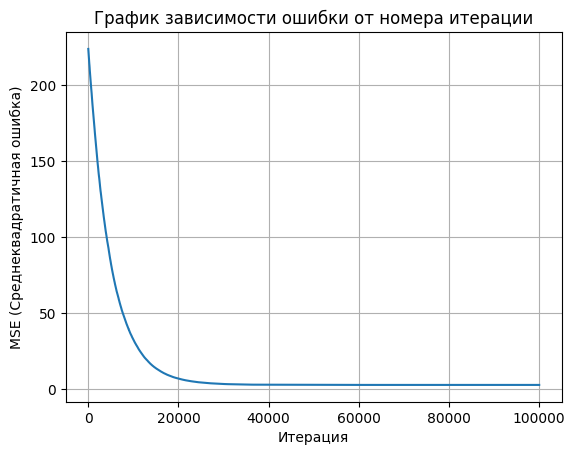

In [136]:
# Строим график зависимости ошибки от номера итерации
plt.plot(mse)
plt.xlabel("Итерация")
plt.ylabel("MSE (Среднеквадратичная ошибка)")
plt.title("График зависимости ошибки от номера итерации")
plt.grid(True)

**Выведите вектор весов, к которому сошелся метод.**

In [137]:
print(f'Вектор весов: {w_new}')

Вектор весов: [14.0157283   3.91834193  2.78218536 -0.02705743]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [138]:
print(f'Среднеквадратичная ошибка на последней итерации: {mse[-1]}')

Среднеквадратичная ошибка на последней итерации: [2.78432652]


**Вывод:** <br>
Используя реализованные алгоритмы оптимизации, удалось значительно улучшить качество предсказаний MSE = 2.78432652 по сравнению с наивным прогнозом MSE = 27.0857437.